In [295]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
iran = pd.read_csv("dataset/FAOSTAT_IRAN_PRODUCER_PRICES.csv")
iran_exchange = pd.read_csv("dataset/FAOSTAT_IRAN_EXCHANGE_RATES_ANNUAL.csv")
iran_population = pd.read_csv("dataset/FAOSTAT_IRAN_POPULATION.csv")

In [258]:
iran_exchange_list = ['Domain Code' , 'Domain' , 'Area Code' , 'Area' , 'ISO Currency Code' ,'Currency' ,
                      'Item' , 'Item Code' , 'Year Code' ,'Note',  'Unit'  , 'Flag' , 'Flag Description']
iran_exchange = iran_exchange.drop(iran_exchange_list, axis= 1)

In [259]:
new_exchange = {'Year': [2019,2020] , 'Value': [140000 , 180000] }
new_exchange = pd.DataFrame(new_exchange)
iran_exchange = iran_exchange.append(new_exchange)
iran_exchange.reset_index(inplace=True)
del iran_exchange['index']

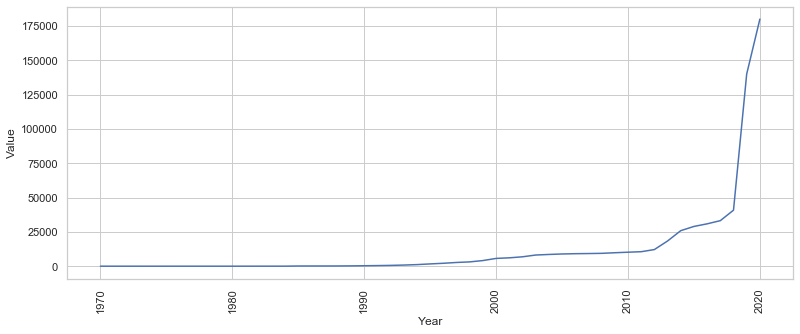

In [260]:
sns.set(style="whitegrid")
plt.figure(figsize=(13, 5))
sns.lineplot(x = 'Year' , y = 'Value' , data = iran_exchange)
plt.ylabel('Value')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

In [261]:
drop_columns_iran = ["Domain Code", "Domain", "Area Code", "Area", "Element Code", "Item Code", "Year Code", "Flag", "Flag Description"]
iran = iran.drop(drop_columns_iran, axis= 1)

In [262]:
home_basket = ['Wheat', "Meat live weight, cattle", "Meat live weight, sheep", "Milk, whole fresh cow ", "Potatoes", "Tomatoes", "Onions, dry",
"Honey, natural", "Tea", "Watermelons", "Sunflower seed", "Soybeans", "Apples", "Rice, paddy", "Eggplants (aubergines)", "Garlic", 
"Fruit, citrus nes", "Fruit, fresh nes", "Vegetables, leguminous nes", "Beans, dry", "Dates", "Lentils", "Oranges", "Tobacco, unmanufactured"]

In [263]:
for index, col in iran.iterrows():
    if col["Item"] not in home_basket:
        iran = iran.drop(index, axis= 0)
iran = iran.reset_index()
iran = iran.drop(["index"], axis= 1)

In [264]:
iran

,Element,Item,Year,Unit,Value
0,Producer Price (USD/tonne),Apples,1991,USD,169.0
1,Producer Price (USD/tonne),Apples,1992,USD,183.3
2,Producer Price (USD/tonne),Apples,1993,USD,131.1
3,Producer Price (USD/tonne),Apples,1994,USD,205.4
4,Producer Price (USD/tonne),Apples,1995,USD,298.6
...,...,...,...,...,...
585,Producer Price (USD/tonne),Wheat,2014,USD,403.8
586,Producer Price (USD/tonne),Wheat,2015,USD,397.6
587,Producer Price (USD/tonne),Wheat,2016,USD,401.8
588,Producer Price (USD/tonne),Wheat,2017,USD,388.2


In [265]:
list_of_items = iran["Item"].unique()

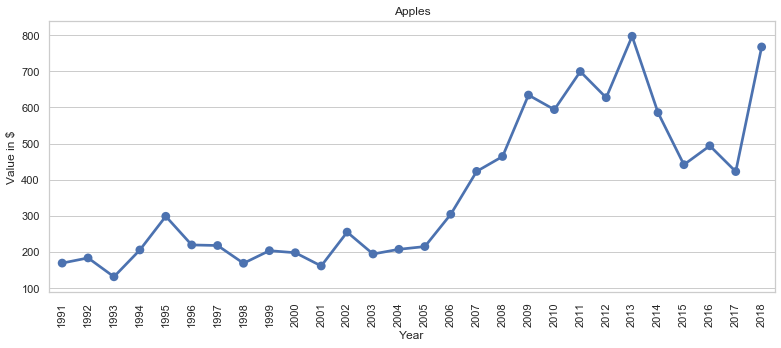

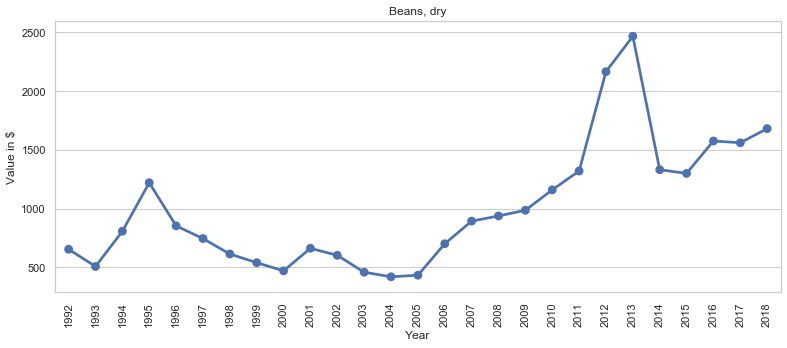

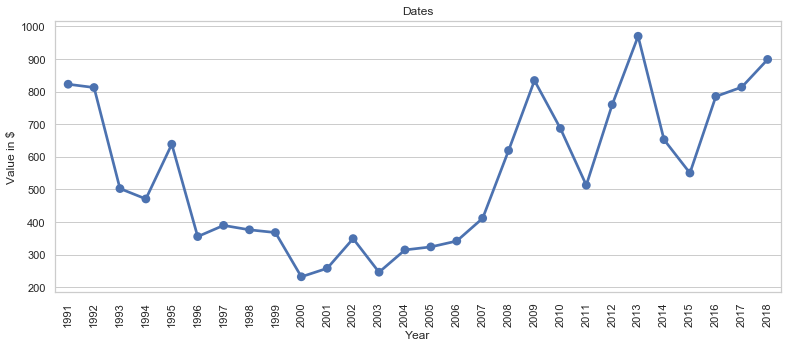

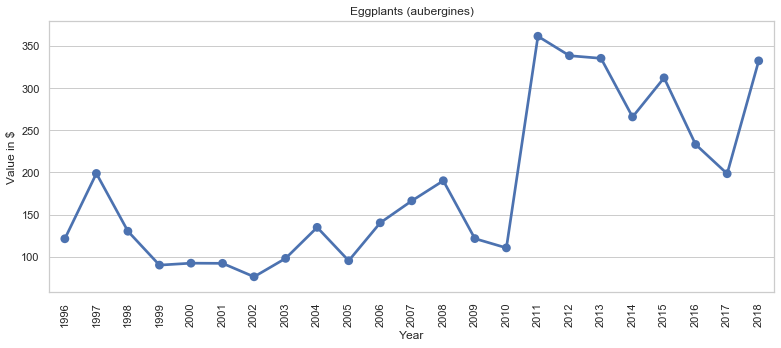

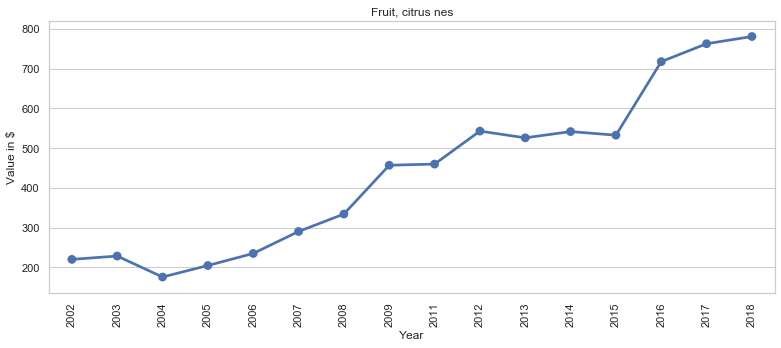

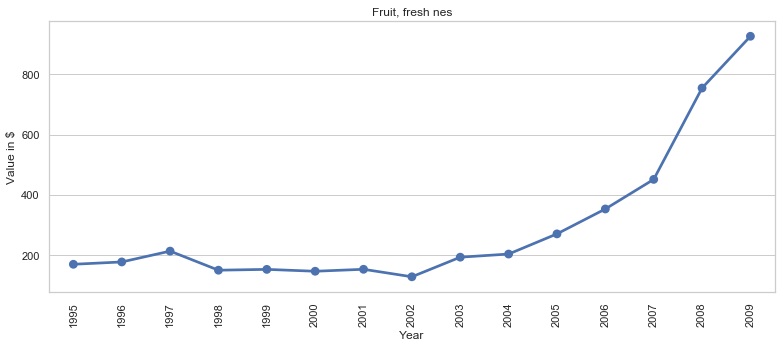

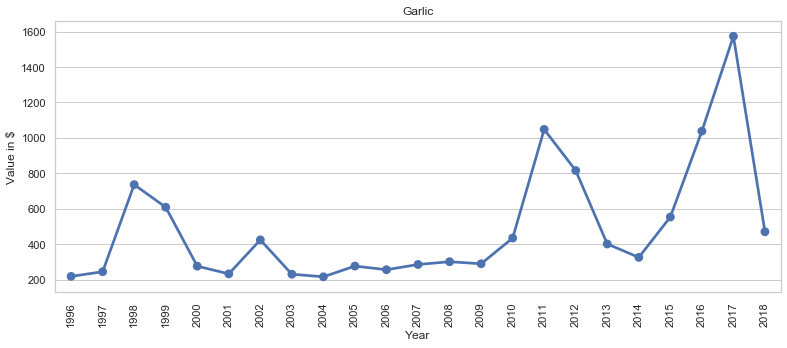

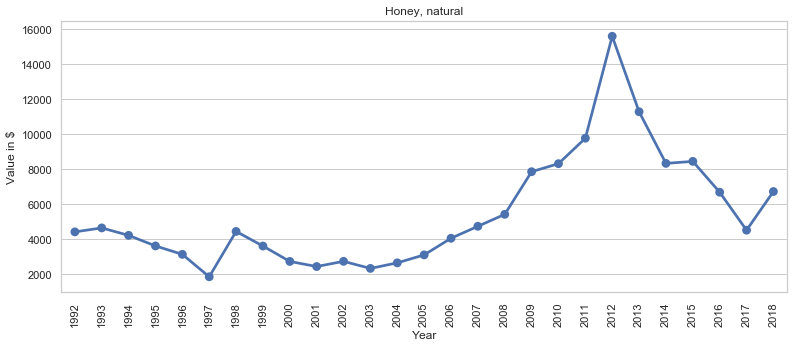

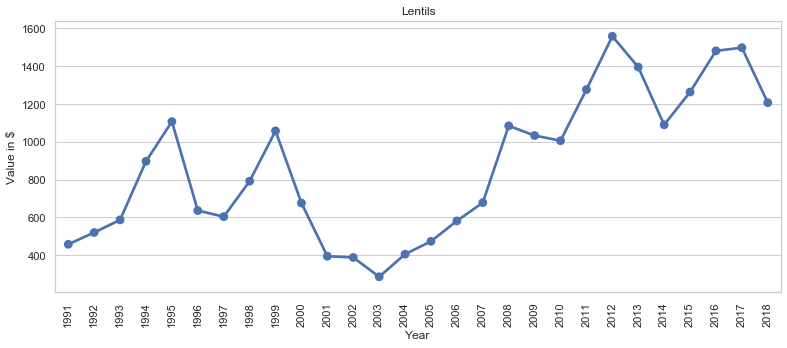

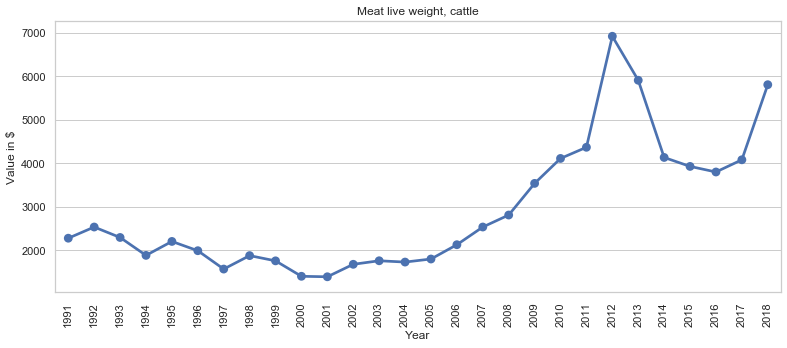

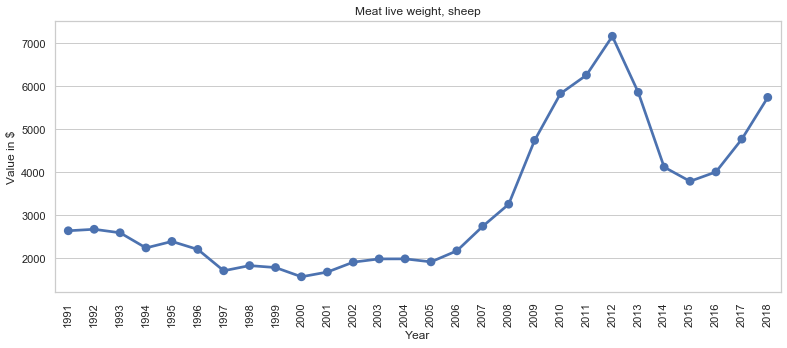

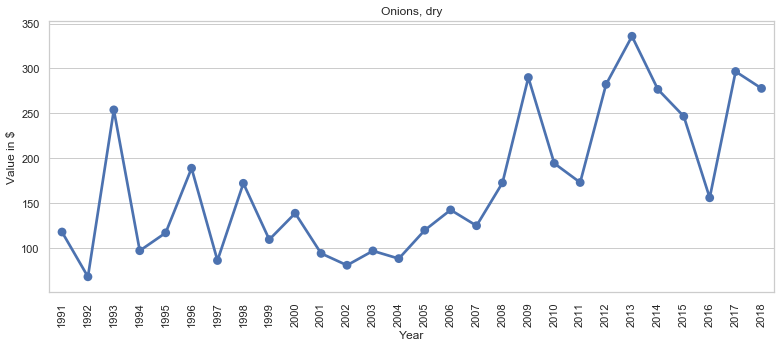

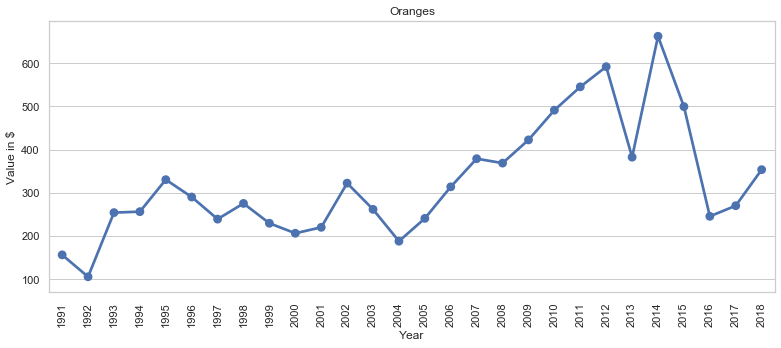

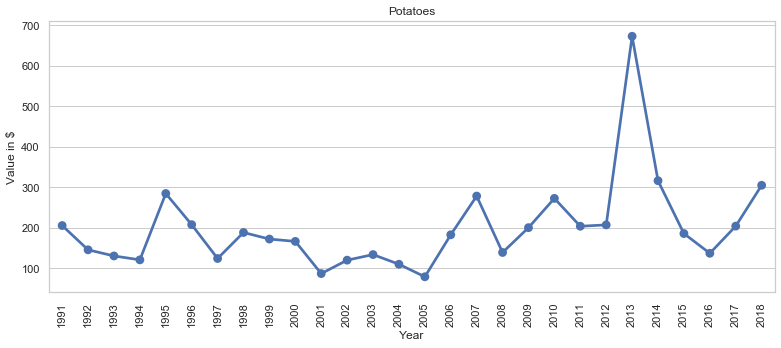

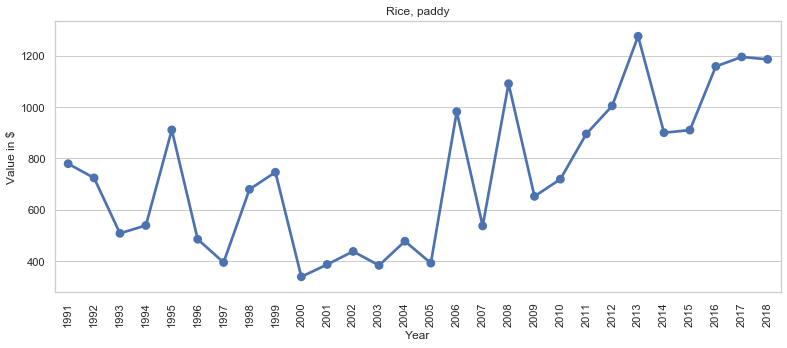

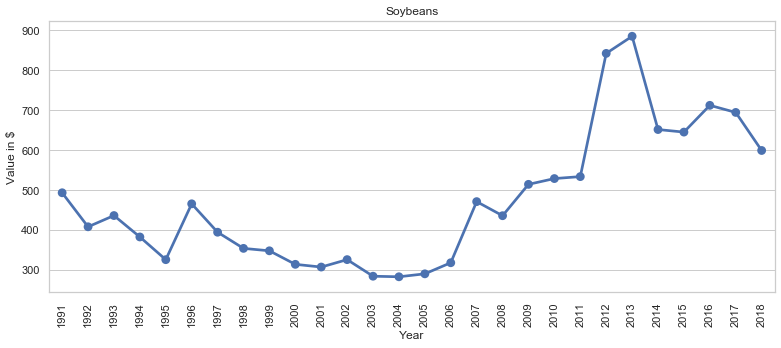

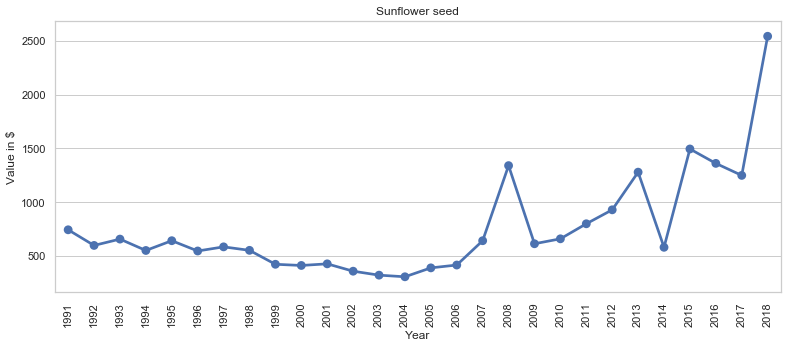

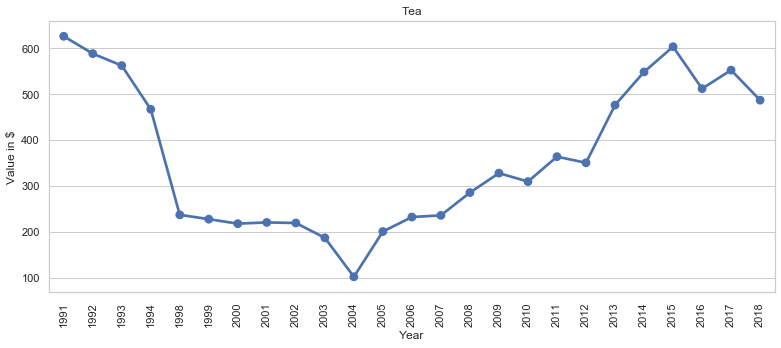

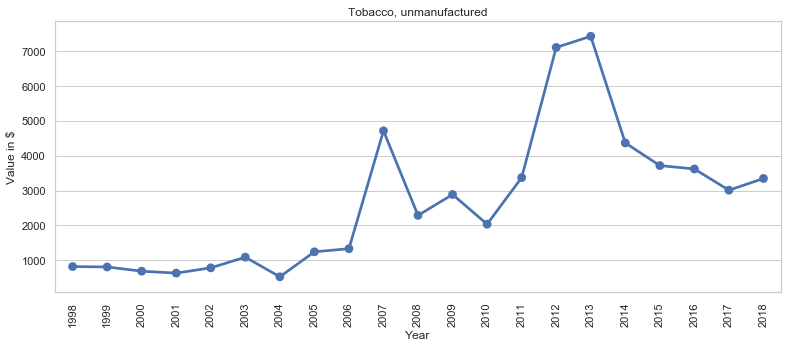

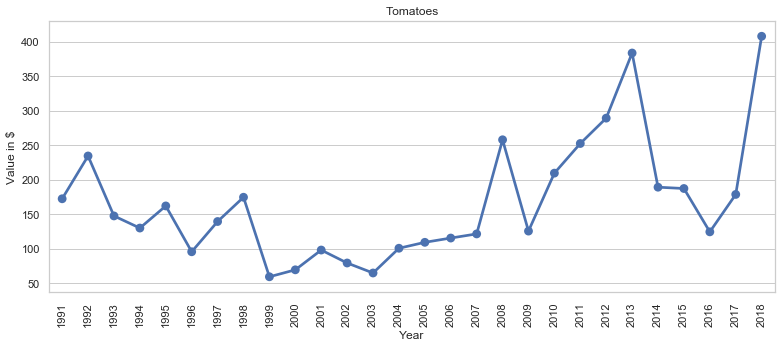

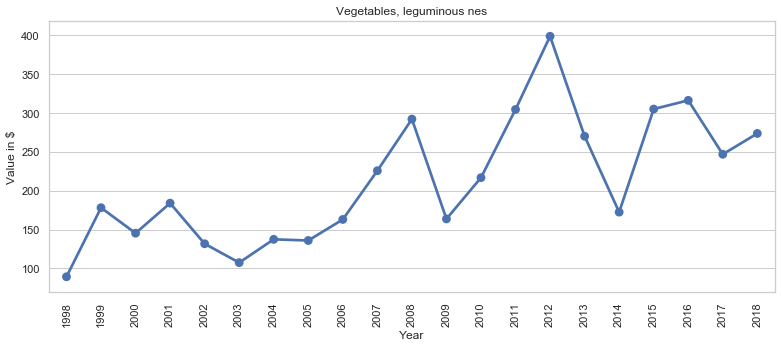

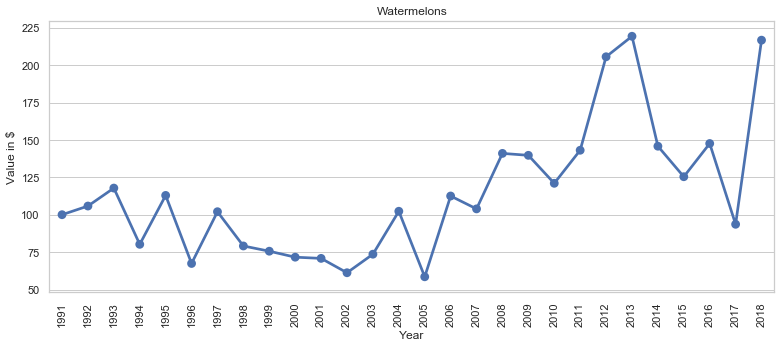

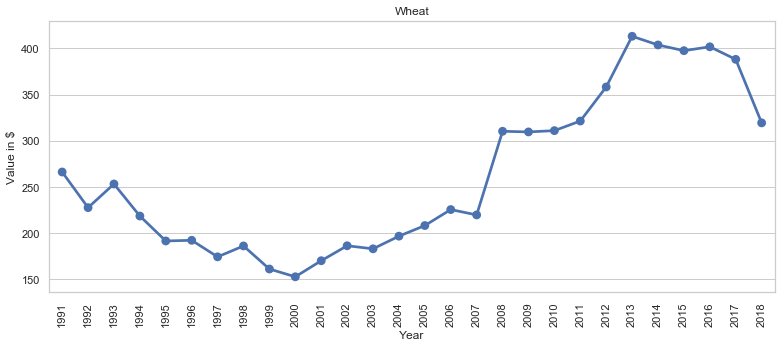

In [266]:
for item in list_of_items:
    df_temp = iran[iran['Item'] == item]
    df_temp.dropna()
    sns.set(style="whitegrid")
    plt.figure(figsize=(13, 5))
    sns.pointplot(x = 'Year' , y = 'Value' , data = df_temp)
    plt.ylabel('Value in $')
    plt.xlabel('Year')
    plt.xticks(rotation = 90)
    plt.title(item)
    plt.show()

In [267]:
iran = iran.merge(iran_exchange, left_on= "Year", right_on="Year", how= "left", suffixes=(" in Dollars", " Dollar per Rials"))

In [268]:
iran

,Element,Item,Year,Unit,Value in Dollars,Value Dollar per Rials
0,Producer Price (USD/tonne),Apples,1991,USD,169.0,511.7000
1,Producer Price (USD/tonne),Apples,1992,USD,183.3,655.1000
2,Producer Price (USD/tonne),Apples,1993,USD,131.1,890.0830
3,Producer Price (USD/tonne),Apples,1994,USD,205.4,1221.7000
4,Producer Price (USD/tonne),Apples,1995,USD,298.6,1725.8000
...,...,...,...,...,...,...
585,Producer Price (USD/tonne),Wheat,2014,USD,403.8,25941.6641
586,Producer Price (USD/tonne),Wheat,2015,USD,397.6,29011.4914
587,Producer Price (USD/tonne),Wheat,2016,USD,401.8,30914.8524
588,Producer Price (USD/tonne),Wheat,2017,USD,388.2,33226.2982


In [269]:
iran["Price in Rial"] = iran["Value in Dollars"] * iran["Value Dollar per Rials"]

In [270]:
iran = iran.drop(["Value Dollar per Rials", "Unit"], axis= 1)

In [271]:
iran["Element"] = iran["Element"].str.replace("/", " and RIALS / ")

In [272]:
iran

,Element,Item,Year,Value in Dollars,Price in Rial
0,Producer Price (USD and RIALS / tonne),Apples,1991,169.0,8.647730e+04
1,Producer Price (USD and RIALS / tonne),Apples,1992,183.3,1.200798e+05
2,Producer Price (USD and RIALS / tonne),Apples,1993,131.1,1.166899e+05
3,Producer Price (USD and RIALS / tonne),Apples,1994,205.4,2.509372e+05
4,Producer Price (USD and RIALS / tonne),Apples,1995,298.6,5.153239e+05
...,...,...,...,...,...
585,Producer Price (USD and RIALS / tonne),Wheat,2014,403.8,1.047524e+07
586,Producer Price (USD and RIALS / tonne),Wheat,2015,397.6,1.153497e+07
587,Producer Price (USD and RIALS / tonne),Wheat,2016,401.8,1.242159e+07
588,Producer Price (USD and RIALS / tonne),Wheat,2017,388.2,1.289845e+07


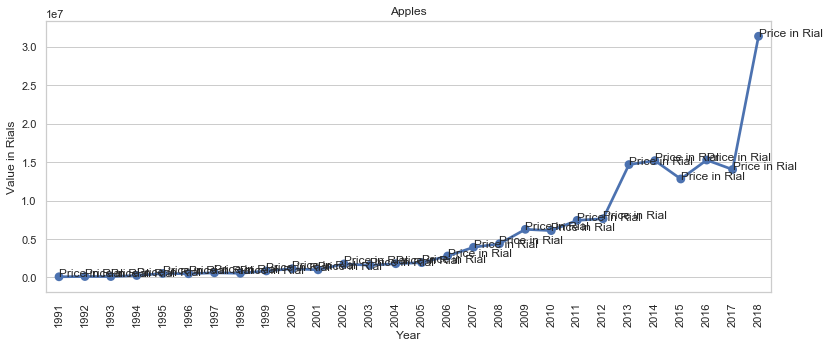

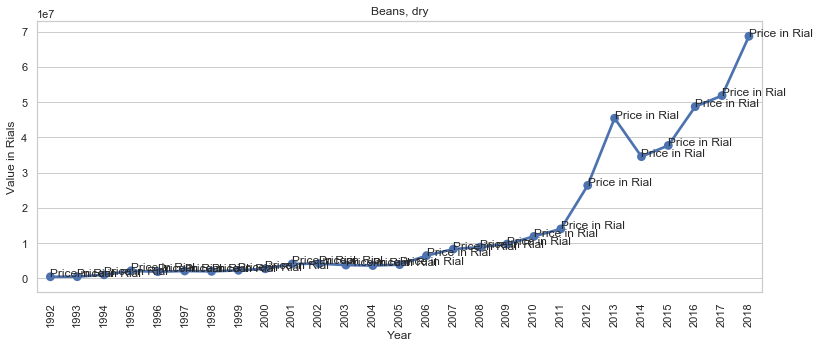

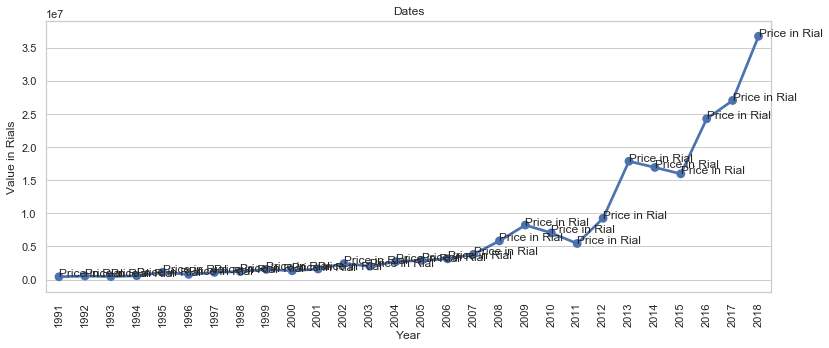

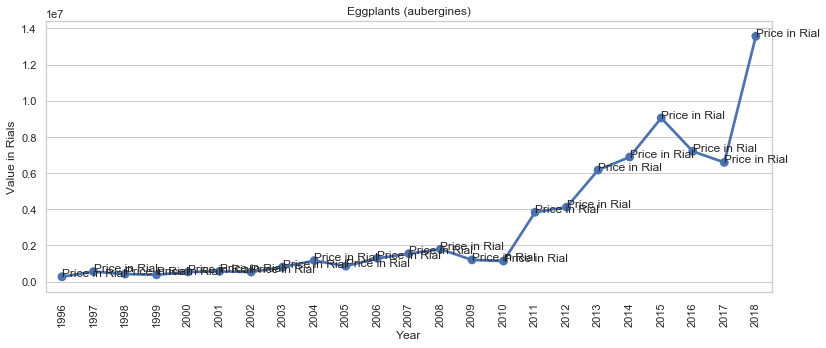

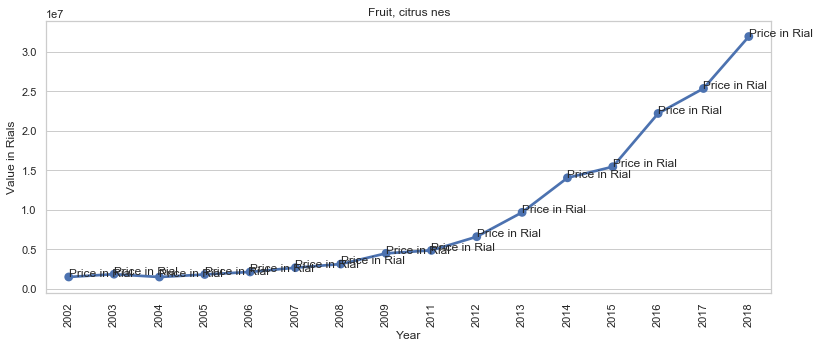

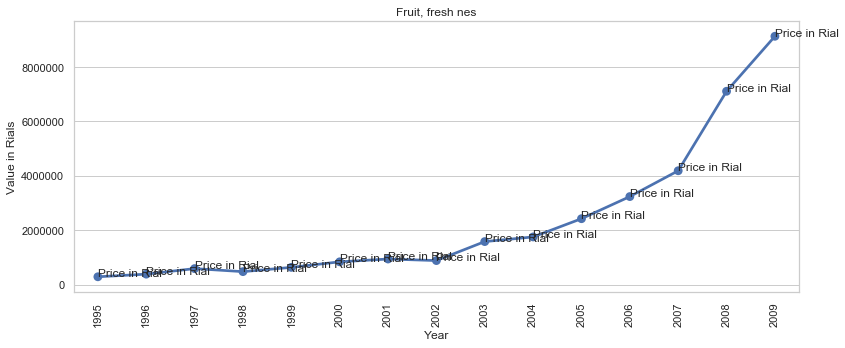

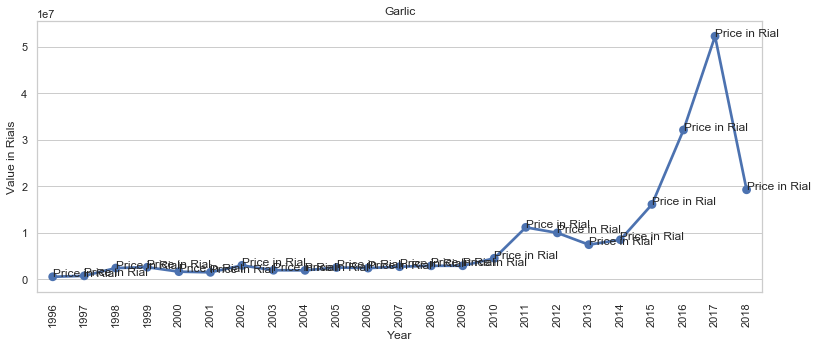

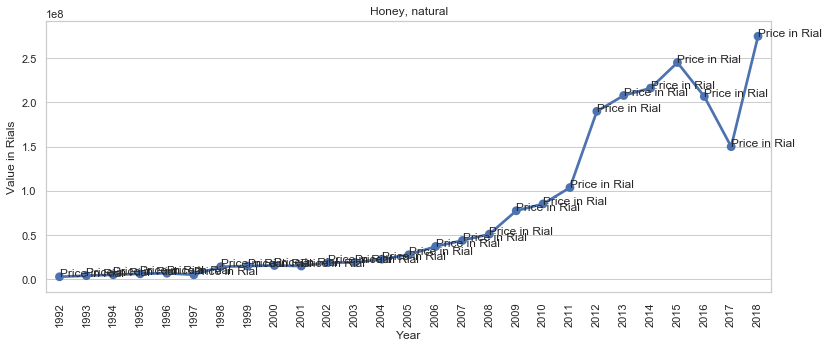

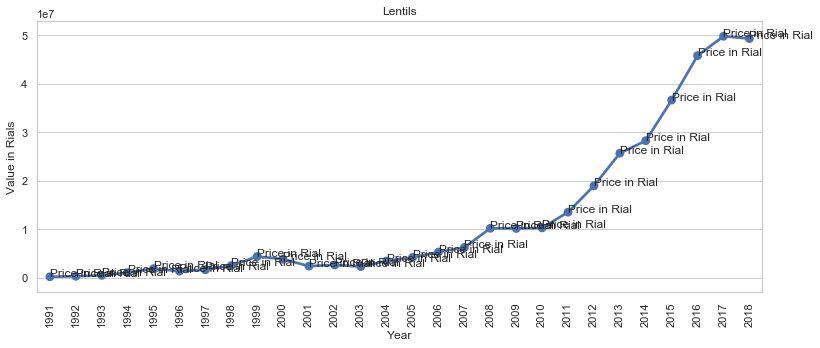

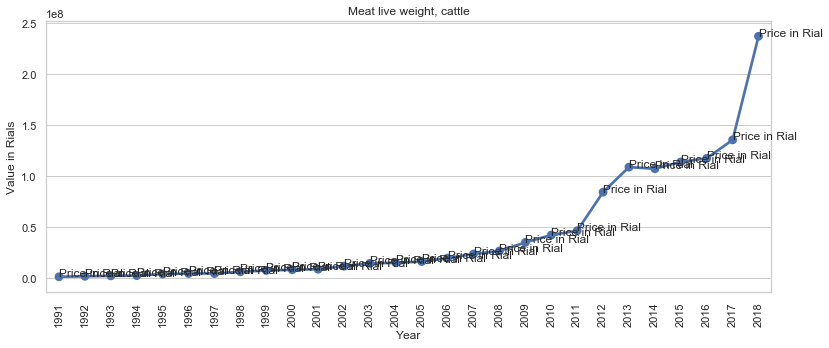

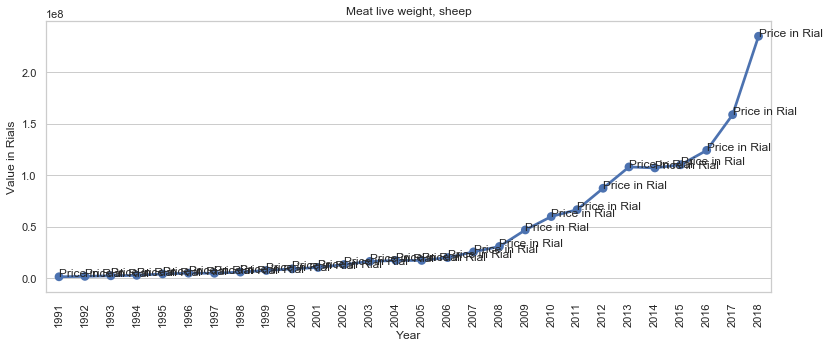

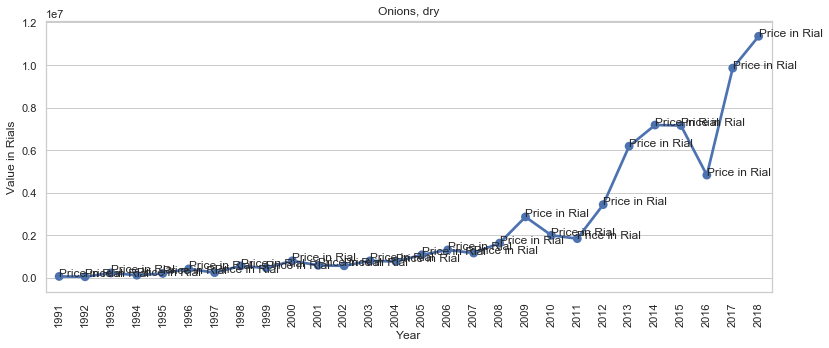

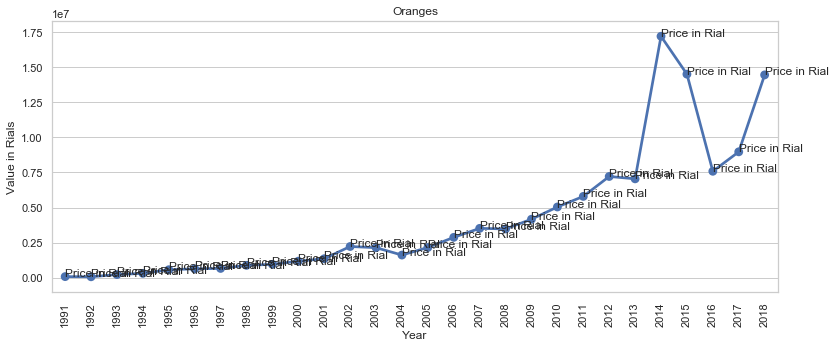

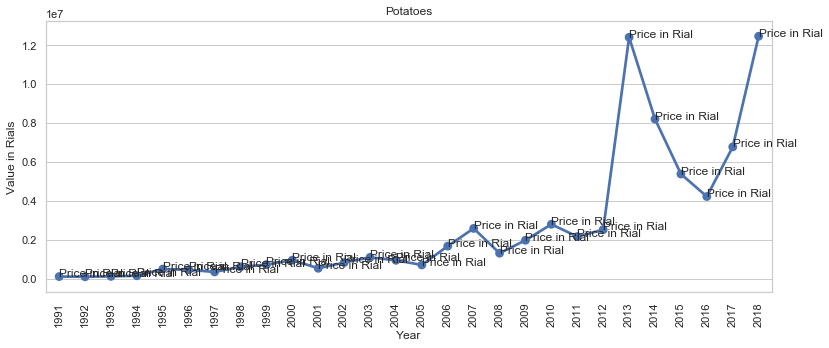

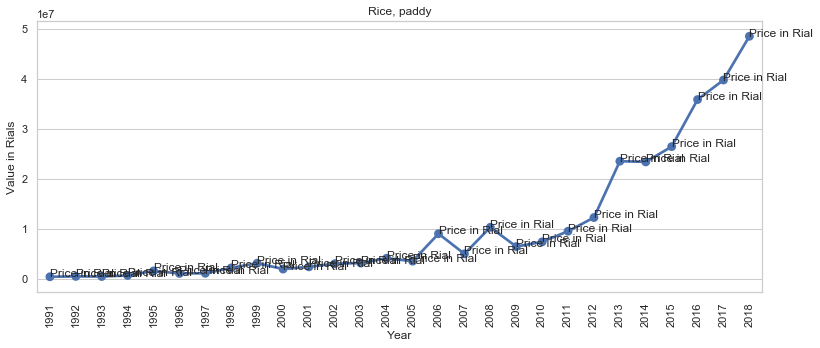

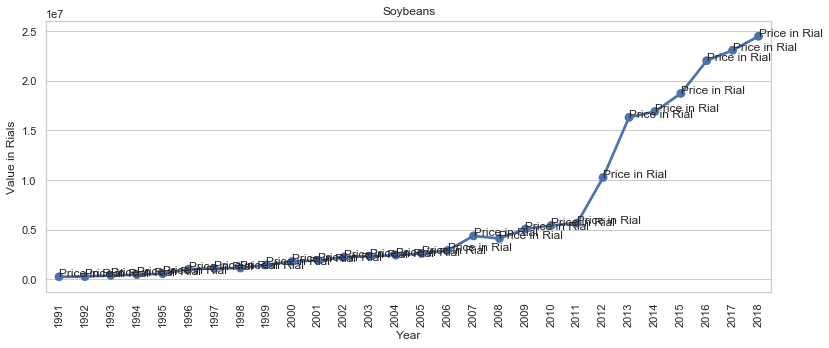

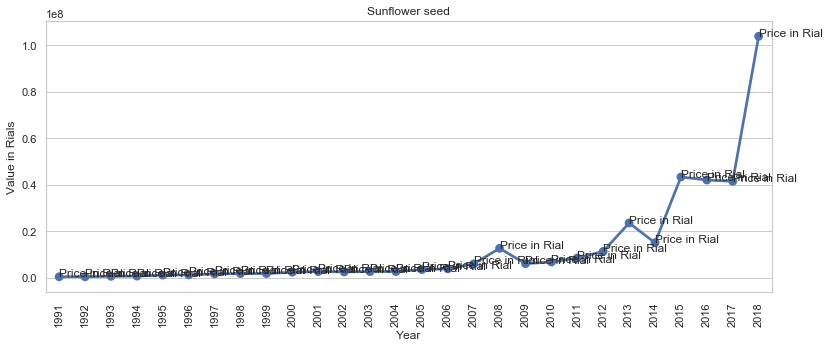

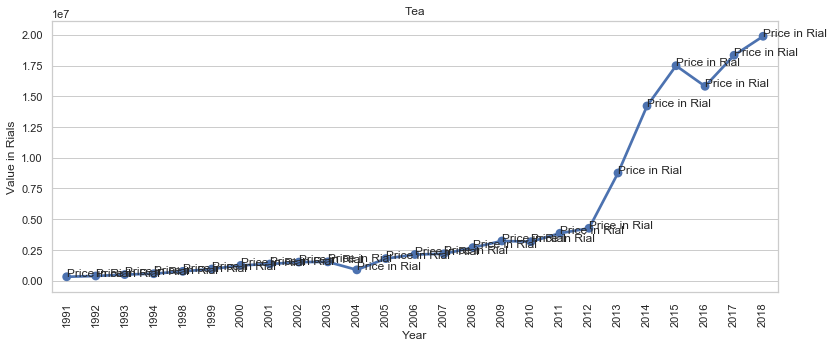

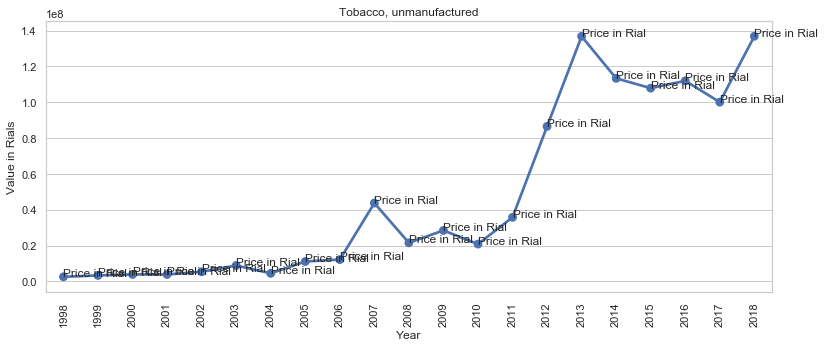

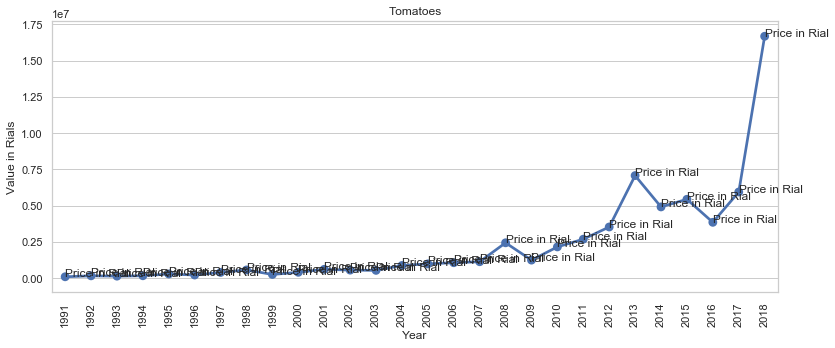

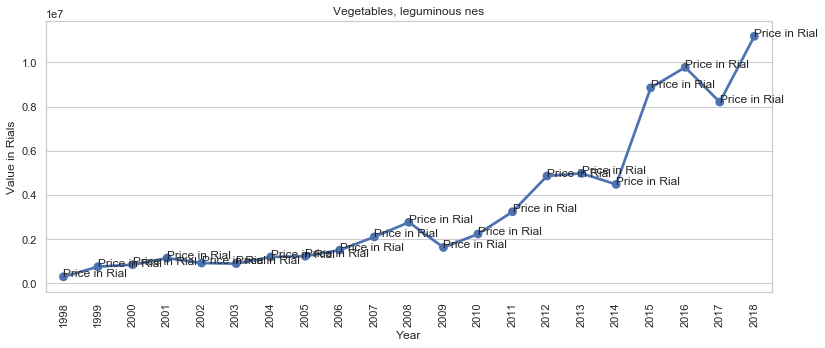

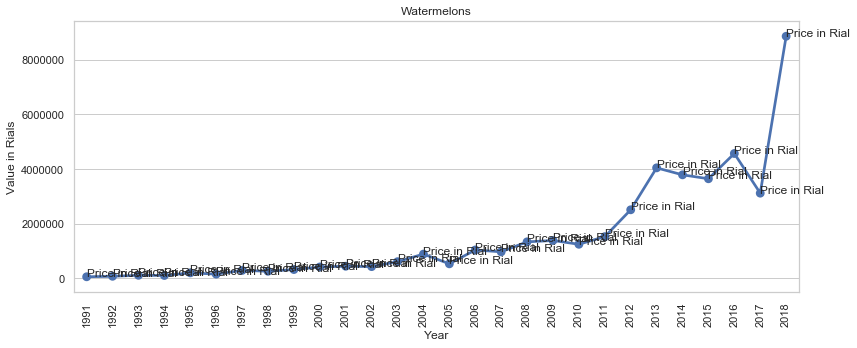

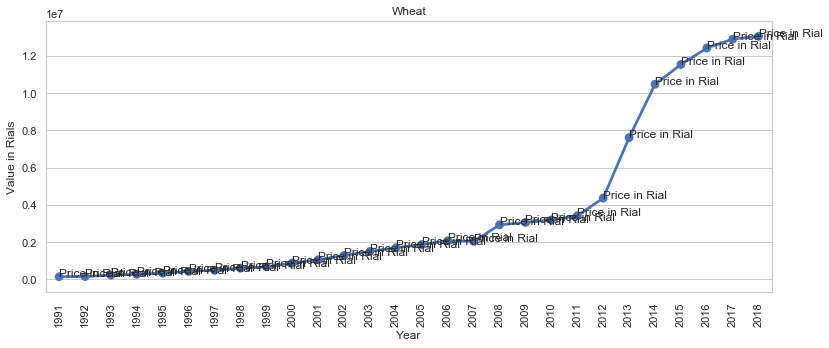

In [292]:
for item in list(iran["Item"].unique()):
    df_temp = iran[iran['Item'] == item]
    df_temp.dropna()
    sns.set(style="whitegrid")
    plt.figure(figsize=(13, 5))
    ax = sns.pointplot(x = 'Year' , y = 'Price in Rial' , data = df_temp)
    for c in ax.collections:
        for of in c.get_offsets():
            ax.annotate("Price in Rial", of)

    plt.ylabel('Value in Rials')
    plt.xlabel('Year')
    plt.xticks(rotation = 90)
    plt.title(item)
    plt.show()

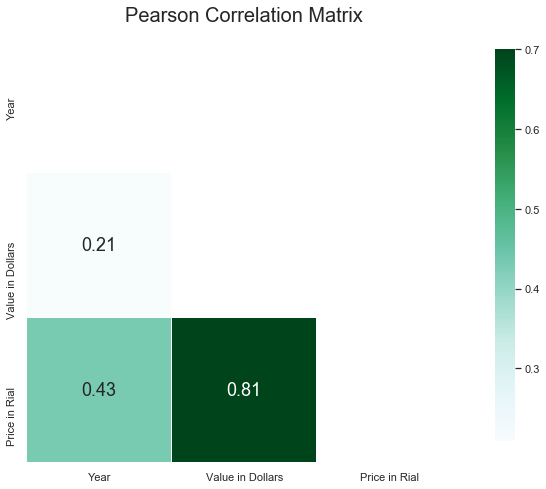

In [301]:
f, ax = plt.subplots(figsize=(12, 8))
mask = np.zeros_like(iran.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

plt.title('Pearson Correlation Matrix',fontsize=20)

sns.heatmap(iran.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":18},mask=mask,cbar_kws={"shrink": .9});